In [47]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

import sklearn
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics

In [48]:
#reading Building1.csv

building1_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_1.csv")
print(building1_data)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [49]:
#reading Building2.csv
#ho notato che tra i vari building hour, month, day_type, daylight_savings_status e solar_generation avevano gli stessi identici valori,
#quindi ho pensato di mantenere solo quelli di building_1 per agevolarmi poi con target e features, però non so se possa andare bene

building2_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_2.csv")
building2_data = building2_data.drop(columns=['hour', 'month', 'day_type', 'daylight_savings_status', 'solar_generation'])
building2_data.columns = ['indoor_dry_bulb_temperature_2',
       'average_unmet_cooling_setpoint_difference_2', 'indoor_relative_humidity_2',
       'non_shiftable_load_2', 'dhw_demand_2', 'cooling_demand_2', 'heating_demand_2',
       'occupant_count_2', 'indoor_dry_bulb_temperature_set_point_2', 'hvac_mode_2']
print(building2_data)

     indoor_dry_bulb_temperature_2  \
0                        24.278513   
1                        24.264734   
2                        24.214113   
3                        24.119434   
4                        23.995500   
..                             ...   
715                      24.995880   
716                      24.997467   
717                      24.997482   
718                      25.108414   
719                      25.548622   

     average_unmet_cooling_setpoint_difference_2  indoor_relative_humidity_2  \
0                                      -0.165932                   60.703620   
1                                      -0.179711                   61.140690   
2                                      -0.230331                   61.779377   
3                                      -0.325011                   62.557430   
4                                      -0.448944                   64.078804   
..                                           ...               

In [50]:
#reading Building3.csv

building3_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_3.csv")
building3_data = building3_data.drop(columns=['hour', 'month', 'day_type', 'daylight_savings_status', 'solar_generation'])
building3_data.columns = ['indoor_dry_bulb_temperature_3',
       'average_unmet_cooling_setpoint_difference_3', 'indoor_relative_humidity_3',
       'non_shiftable_load_3', 'dhw_demand_3', 'cooling_demand_3', 'heating_demand_3',
       'occupant_count_3', 'indoor_dry_bulb_temperature_set_point_3', 'hvac_mode_3']
print(building3_data)


     indoor_dry_bulb_temperature_3  \
0                        24.431562   
1                        24.444384   
2                        24.444445   
3                        24.444439   
4                        24.361916   
..                             ...   
715                      24.444447   
716                      24.444450   
717                      24.444450   
718                      24.444450   
719                      24.444440   

     average_unmet_cooling_setpoint_difference_3  indoor_relative_humidity_3  \
0                                  -1.288156e-02                   57.864120   
1                                  -6.162604e-05                   58.086220   
2                                   9.792859e-07                   58.383118   
3                                  -4.807433e-06                   59.098373   
4                                  -8.252885e-02                   60.374480   
..                                           ...               

In [51]:
carbon_data = pd.read_csv("citylearn_challenge_2023_phase_1/carbon_intensity.csv")
print(carbon_data)

     carbon_intensity
0            0.402488
1            0.382625
2            0.369458
3            0.367017
4            0.374040
..                ...
715          0.465811
716          0.470324
717          0.462414
718          0.448648
719          0.428057

[720 rows x 1 columns]


In [52]:
pricing_data = pd.read_csv("citylearn_challenge_2023_phase_1/pricing.csv")
print(pricing_data)

     electricity_pricing  electricity_pricing_predicted_6h  \
0                0.02893                           0.02893   
1                0.02893                           0.02915   
2                0.02893                           0.02915   
3                0.02893                           0.02915   
4                0.02893                           0.02915   
..                   ...                               ...   
715              0.02893                           0.02893   
716              0.02893                           0.02893   
717              0.02893                           0.02893   
718              0.02893                           0.02893   
719              0.02893                           0.02893   

     electricity_pricing_predicted_12h  electricity_pricing_predicted_24h  
0                              0.02915                            0.02893  
1                              0.02915                            0.02893  
2                          

In [53]:
weather_data = pd.read_csv("citylearn_challenge_2023_phase_1/weather.csv")
print(weather_data)

     outdoor_dry_bulb_temperature  outdoor_relative_humidity  \
0                           24.66                      77.56   
1                           24.07                      85.12   
2                           23.90                      89.62   
3                           23.87                      91.88   
4                           23.83                      93.06   
..                            ...                        ...   
715                         31.98                      43.75   
716                         29.92                      51.62   
717                         28.48                      59.12   
718                         27.27                      66.56   
719                         26.26                      73.75   

     diffuse_solar_irradiance  direct_solar_irradiance  \
0                        0.00                     0.00   
1                        0.00                     0.00   
2                        0.00                     0.00   

In [54]:
#qui ho riutilizzato concat come in prova2 ma con l'unica differenza di aver concatenato per colonna invece che per riga
#così ottengo come si vede sotto un dataset composto sempre da 720 righe ma 56 colonne
#quindi ogni riga rappresenterebbe come sempre una rilevazione però troveremo "contemporaneamente" le rilevazioni
#della building_1, building_2, building_3
#E se non crea problemi come nel caso di prova2 dove i valori venivano presi in modo "sequenziale" se non sbaglio, posso provare a fare
#questa concat anche per la causal discovery in modo da fare la predizione visto che la flag multiple non è compatibile con il metodo Prediction

df = pd.concat([building1_data, building2_data, building3_data, carbon_data, pricing_data, weather_data], axis=1)
print(df)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [55]:
def create_model_large():
    # create model
    model = Sequential()
    #your code here	
    model.add(Dense(55, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(Dense(110, activation = 'relu'))
    model.add(Dense(55, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = [metrics.mae])
    
    return model

In [56]:
def NRMSE(real, pred):
    return sqrt(mean_squared_error(real, pred)/(real.max() - real.min()))

In [57]:
# Funzione per calcolare NRMSE per una singola variabile con finestra temporale
#per facilitarmi ho cercato di calcolare lo ScoreForecast come se avessi una sola variabile
#poi come si vede in fondo al file faccio una classica media sugli nrmse calcolati in questo modo

def NRMSE_window_single_variable(real, pred, w):
    num_timesteps = len(real)  # Total number of time steps, quindi quello che è indicato con n
    nrmse_windows = []  # Lista per raccogliere gli NRMSE di ciascuna finestra, quindi dalla formula la sommatoria sotto radice
    
    # Itero su ogni finestra temporale
    for t in range(num_timesteps - w + 1):
        #qui cerco di trovare quello che in teoria definisce ft,τv: Forecast of variable v for time step t+τ, made at time t;
        
        real_window = real[t:t+w]
        pred_window = pred[t:t+w]
        
        # Calcolo l'NRMSE tra i valori reali e predetti della finestra e lo aggiungo alla lista
        nrmse_windows.append(NRMSE(real_window, pred_window))
    
    # Restituisco infine la media degli NRMSE per tutte le finestre temporali
    return np.mean(nrmse_windows)

In [58]:
# Descriptive statistics summary
df.describe()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,...,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
count,720.0,720.000000,720.000000,720.0,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,6.0,12.500000,4.100000,0.0,24.024244,0.003642,57.808783,0.625618,0.213675,3.333438,...,29.620327,63.424809,62.786474,61.793372,90.000166,92.607278,91.938938,269.654399,270.472846,272.939691
std,0.0,6.926999,1.973679,0.0,1.538245,0.042871,4.707318,0.810932,0.469465,1.827450,...,4.958327,23.154273,23.444021,24.038353,107.451266,113.491246,115.477304,308.867793,313.529048,320.500605
min,6.0,1.000000,1.000000,0.0,19.999914,-0.238674,46.463528,0.319633,0.000000,0.000000,...,20.947014,19.430300,18.265532,16.665543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.0,6.750000,2.000000,0.0,22.332079,-0.000159,54.488178,0.355173,0.000000,2.076277,...,25.301469,41.746715,42.122503,41.263382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.0,12.500000,4.000000,0.0,24.444309,0.000007,57.407695,0.405048,0.000000,3.043866,...,28.401583,63.427841,63.155060,59.349503,59.419070,62.671502,53.935234,113.453980,100.850993,104.554913
75%,6.0,18.250000,6.000000,0.0,24.444458,0.000476,61.325861,0.528865,0.218549,4.262129,...,33.839770,82.917892,81.912389,81.111492,147.018658,154.836665,149.505160,542.437350,547.864400,519.350328
max,6.0,24.000000,7.000000,0.0,27.222233,0.353503,67.854750,7.458969,4.565351,10.608549,...,40.484505,100.000000,100.000000,100.000000,461.251400,554.828740,551.798160,1056.334800,1129.740700,1237.587500


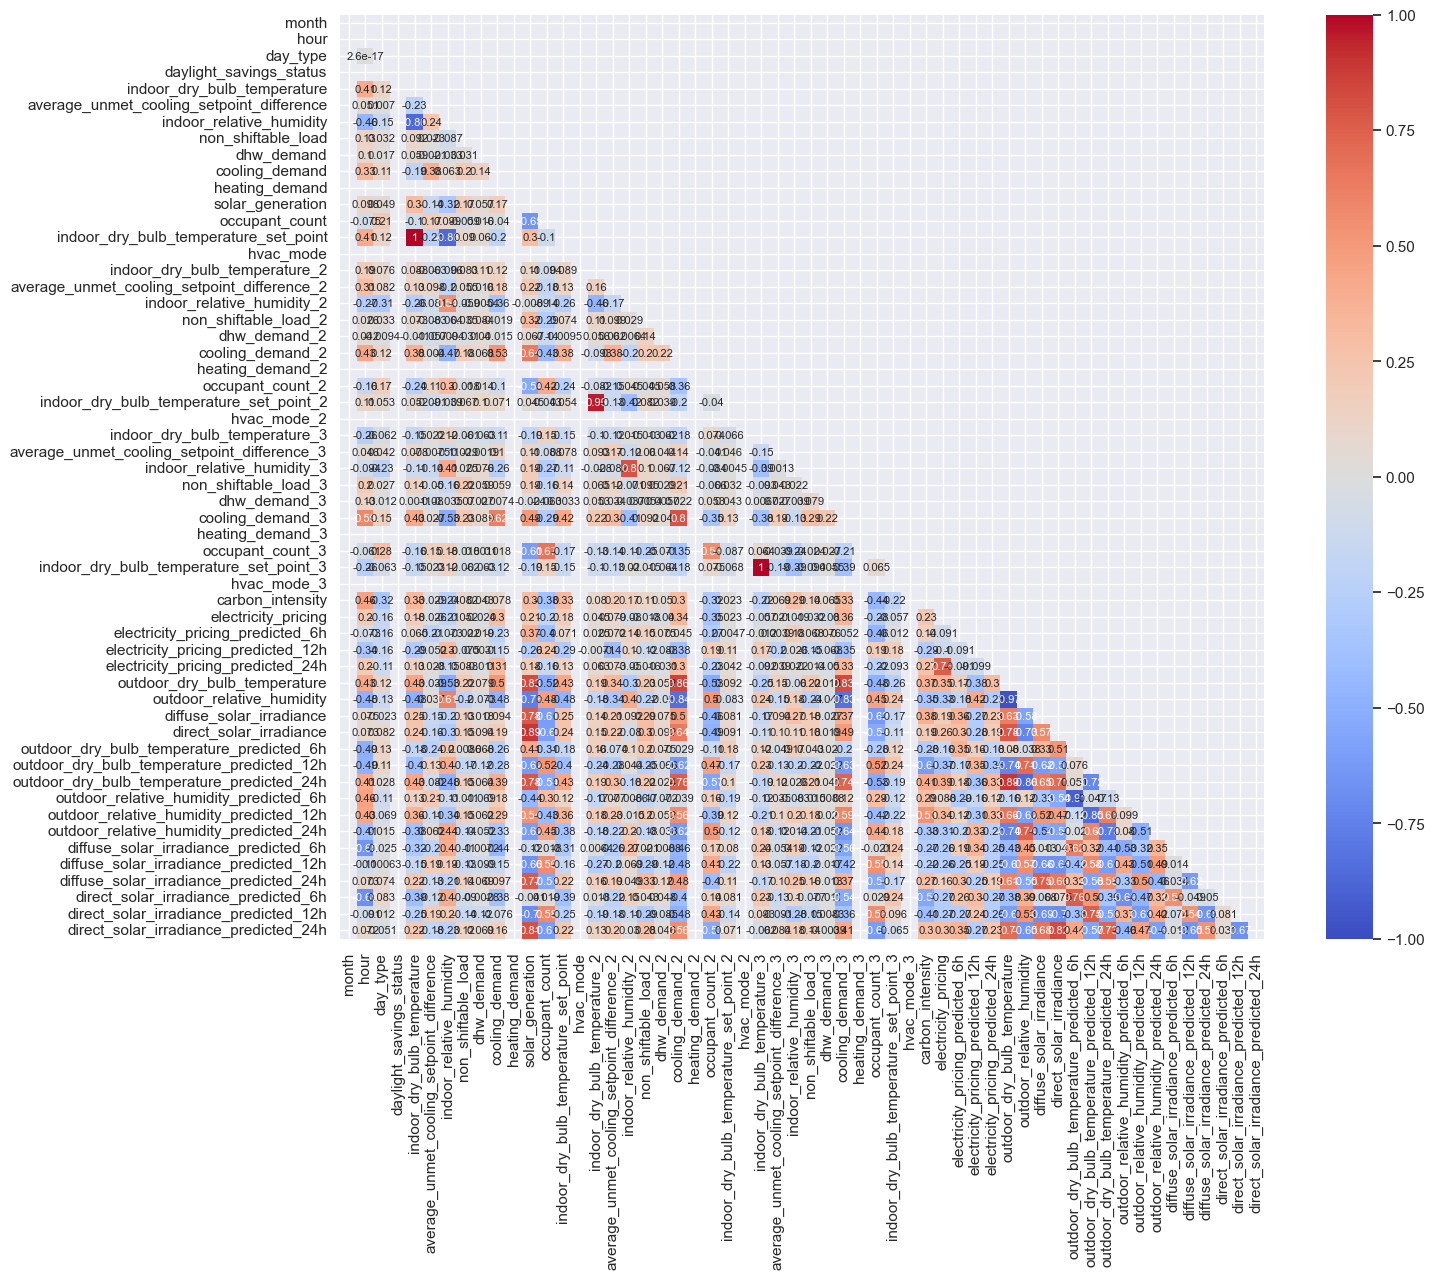

In [59]:
# Correlation matrix
corrmat = df.corr()

# Generate a mask for the upper triangle
matrix = np.triu(corrmat)
f, ax = plt.subplots(figsize=(16, 12))
sns.set(font_scale=1)
sns.heatmap(corrmat, vmin=-1, vmax=1, center= 0, square=True, annot=True, annot_kws={'size': 8}, mask=matrix, fmt='.2g', cmap= 'coolwarm')

plt.show()

Ora seguiranno in ordine le predizioni relative a:

    1. carbon intensity
    2. solar generation

Predizione della carbon intensity

In [60]:
dataframe = df
# Standardizing data
sc= MinMaxScaler(feature_range=(-1,1))

target = 'carbon_intensity'

features = ['month', 'hour', 'day_type', 'daylight_savings_status',
       'indoor_dry_bulb_temperature',
       'average_unmet_cooling_setpoint_difference', 'indoor_relative_humidity',
       'non_shiftable_load', 'dhw_demand', 'cooling_demand', 'heating_demand',
       'solar_generation', 'occupant_count',
       'indoor_dry_bulb_temperature_set_point', 'hvac_mode',
       'indoor_dry_bulb_temperature_2',
       'average_unmet_cooling_setpoint_difference_2',
       'indoor_relative_humidity_2', 'non_shiftable_load_2', 'dhw_demand_2',
       'cooling_demand_2', 'heating_demand_2', 'occupant_count_2',
       'indoor_dry_bulb_temperature_set_point_2', 'hvac_mode_2',
       'indoor_dry_bulb_temperature_3',
       'average_unmet_cooling_setpoint_difference_3',
       'indoor_relative_humidity_3', 'non_shiftable_load_3', 'dhw_demand_3',
       'cooling_demand_3', 'heating_demand_3', 'occupant_count_3',
       'indoor_dry_bulb_temperature_set_point_3', 'hvac_mode_3',
       'electricity_pricing', 'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h',
       'electricity_pricing_predicted_24h', 'outdoor_dry_bulb_temperature',
       'outdoor_relative_humidity', 'diffuse_solar_irradiance',
       'direct_solar_irradiance', 'outdoor_dry_bulb_temperature_predicted_6h',
       'outdoor_dry_bulb_temperature_predicted_12h',
       'outdoor_dry_bulb_temperature_predicted_24h',
       'outdoor_relative_humidity_predicted_6h',
       'outdoor_relative_humidity_predicted_12h',
       'outdoor_relative_humidity_predicted_24h',
       'diffuse_solar_irradiance_predicted_6h',
       'diffuse_solar_irradiance_predicted_12h',
       'diffuse_solar_irradiance_predicted_24h',
       'direct_solar_irradiance_predicted_6h',
       'direct_solar_irradiance_predicted_12h',
       'direct_solar_irradiance_predicted_24h']

for var in features:
    if(var != 'carbon_intensity'):
        dataframe[var] = sc.fit_transform(dataframe[var].values.reshape(-1, 1))

In [61]:
#NumPy representation of the data frame (removing labels)
dataframe = pd.DataFrame(data=dataframe)

X = dataframe.drop(columns='carbon_intensity')
X = X.to_numpy()

Y = dataframe['carbon_intensity']
Y = Y.to_numpy()


seed = 7
np.random.seed(seed)

# split dataset in 70% for traininig and 30% for testing (500 -> 375,125)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# split training in 80% for traininig and 20% for validating (375 -> 300,75)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=seed)#insert your code here

# Model creation (choose between tiny, small, medium and large by using the appropriate function)
model = create_model_large()
model.summary()

c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 55)             │         3,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 110)            │         6,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 55)             │         6,105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,401 (60.16 KB)

 Trainable params: 15,401 (60.16 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=32)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3624 - mean_absolute_error: 0.5015 - val_loss: 0.0259 - val_mean_absolute_error: 0.1338
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.1191 - val_loss: 0.0178 - val_mean_absolute_error: 0.1169
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0825 - val_loss: 0.0069 - val_mean_absolute_error: 0.0704
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0539 - val_loss: 0.0040 - val_mean_absolute_error: 0.0524
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0408 - val_loss: 0.0031 - val_mean_absolute_error: 0.0438
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0342 - val_loss: 0.0028 - val_mean_absolute_error: 0.0418
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0320 - val_los

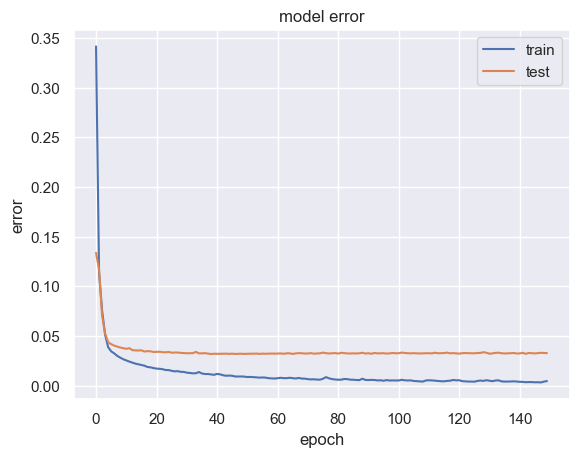

In [63]:
# Summarize history for error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

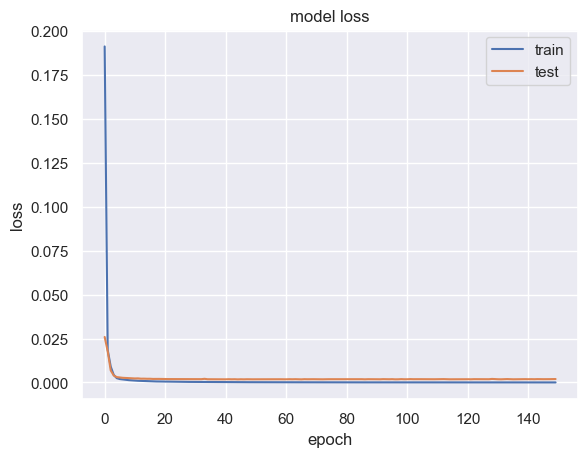

In [64]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [65]:
# Prediction
pred = model.predict(X_test).reshape(1,-1)[0]

nrmse_carbon = NRMSE(y_test, pred)


print("nrmse : ",nrmse_carbon)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
nrmse :  0.08717320393281992


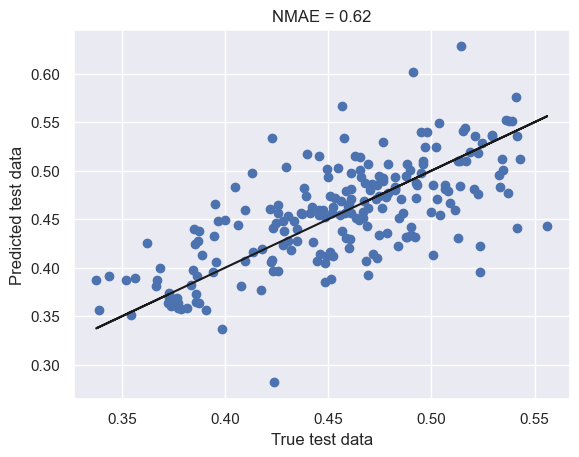

In [66]:
plt.scatter(y_test, pred)
plt.title(r"NMAE = %.2f" % (np.abs(y_test - pred).mean()/y_test.std()))
plt.plot(y_test, y_test, 'k-')
plt.xlabel('True test data')
plt.ylabel('Predicted test data')
plt.show()

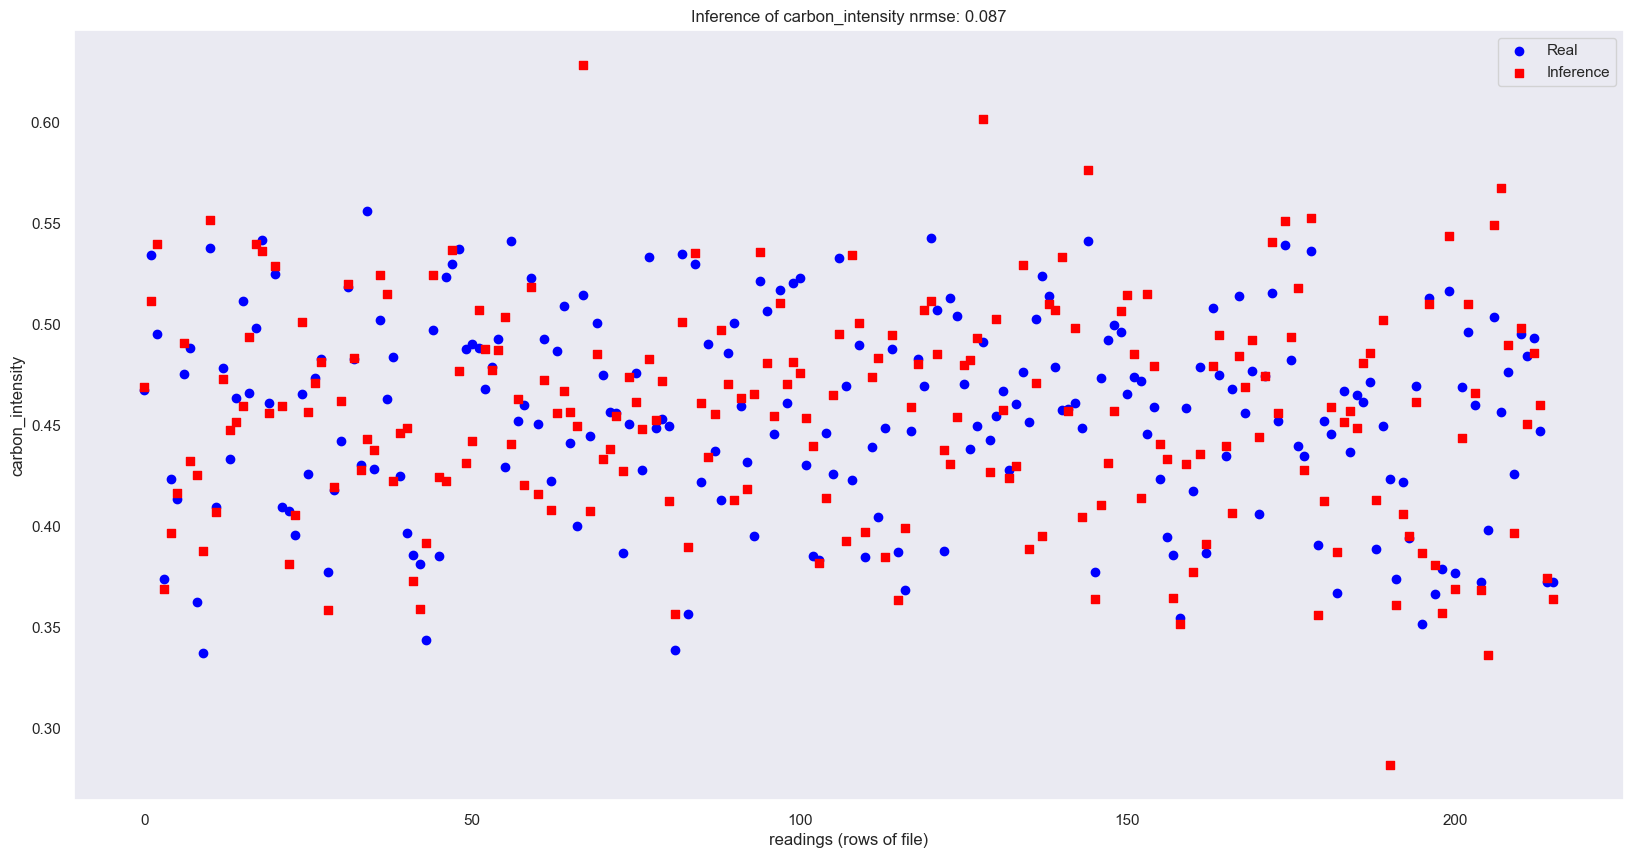

In [67]:
my_x=np.arange(0,len(X_test[:, 0]),1)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, y_test, label='Real', color='blue', marker='o')
plt.scatter(my_x, pred, label='Inference', color='red', marker='s')
plt.title(f'Inference of carbon_intensity nrmse: {nrmse_carbon:.3f}')
plt.ylabel('carbon_intensity')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

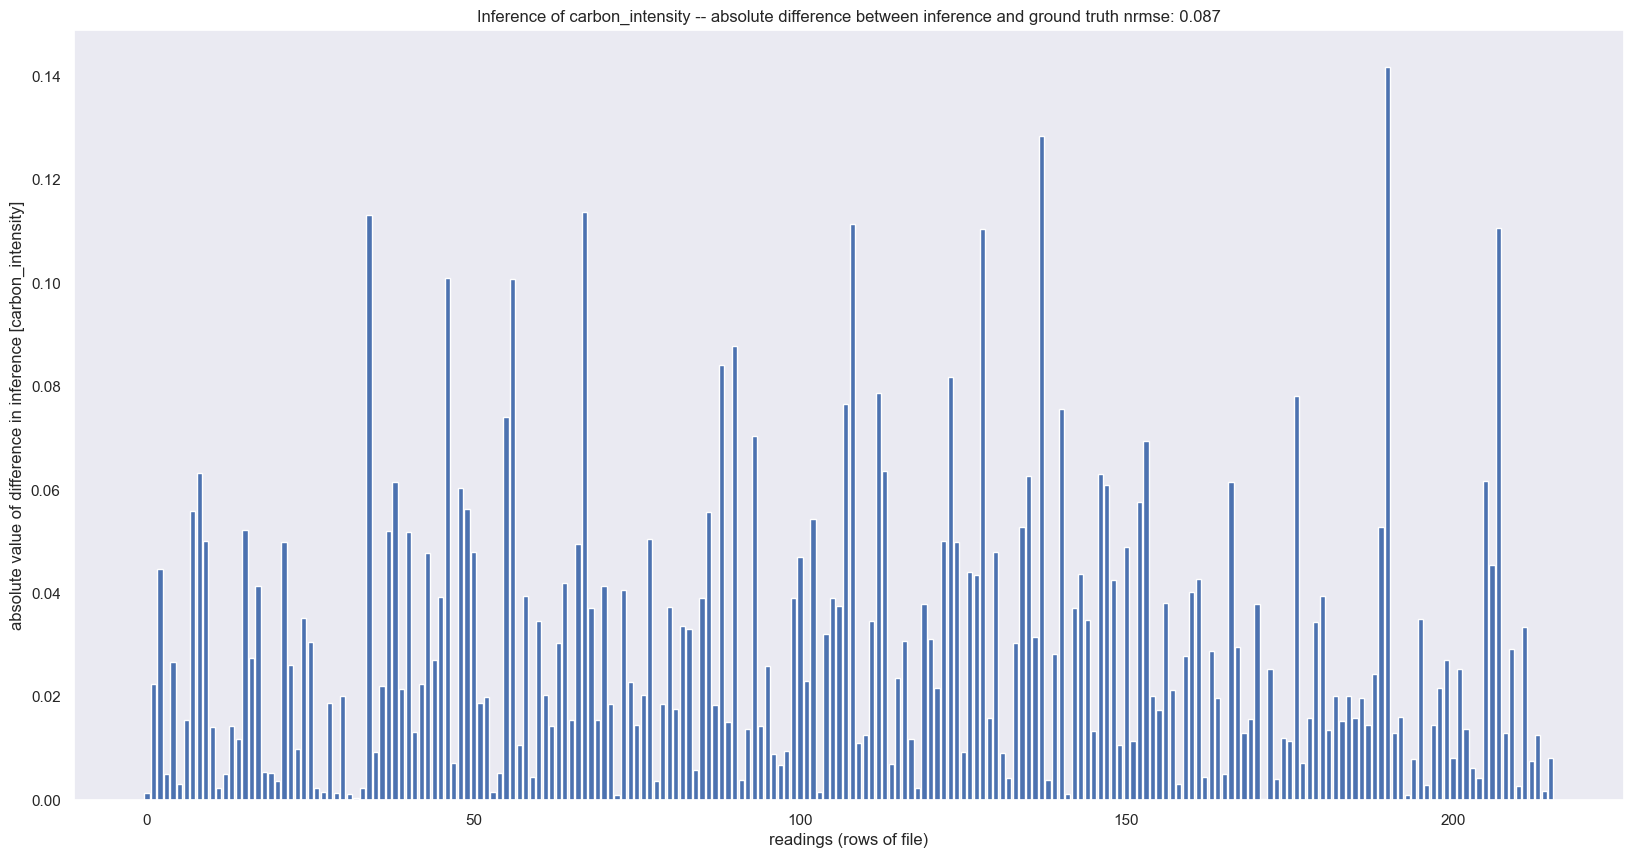

In [69]:
fig = plt.figure(figsize=(20,10))
my_d = abs(y_test-pred)

plt.bar(my_x,my_d)
plt.title(f'Inference of carbon_intensity -- absolute difference between inference and ground truth nrmse: {nrmse_carbon:.3f}')
plt.ylabel('absolute value of difference in inference [carbon_intensity]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()

In [70]:
w = 48

nrmse_single_carbon = NRMSE_window_single_variable(y_test, pred, w)
print("NRMSE per singola variabile con finestra temporale:", nrmse_single_carbon)

NRMSE per singola variabile con finestra temporale: 0.09575199936679869


Predizione della solar generation

In [71]:
dataframe = df
# Standardizing data
sc= MinMaxScaler(feature_range=(-1,1))

target = 'solar_generation'

features = ['month', 'hour', 'day_type', 'daylight_savings_status',
       'indoor_dry_bulb_temperature',
       'average_unmet_cooling_setpoint_difference', 'indoor_relative_humidity',
       'non_shiftable_load', 'dhw_demand', 'cooling_demand', 'heating_demand',
       'carbon_intensity', 'occupant_count',
       'indoor_dry_bulb_temperature_set_point', 'hvac_mode',
       'indoor_dry_bulb_temperature_2',
       'average_unmet_cooling_setpoint_difference_2',
       'indoor_relative_humidity_2', 'non_shiftable_load_2', 'dhw_demand_2',
       'cooling_demand_2', 'heating_demand_2', 'occupant_count_2',
       'indoor_dry_bulb_temperature_set_point_2', 'hvac_mode_2',
       'indoor_dry_bulb_temperature_3',
       'average_unmet_cooling_setpoint_difference_3',
       'indoor_relative_humidity_3', 'non_shiftable_load_3', 'dhw_demand_3',
       'cooling_demand_3', 'heating_demand_3', 'occupant_count_3',
       'indoor_dry_bulb_temperature_set_point_3', 'hvac_mode_3',
       'electricity_pricing', 'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h',
       'electricity_pricing_predicted_24h', 'outdoor_dry_bulb_temperature',
       'outdoor_relative_humidity', 'diffuse_solar_irradiance',
       'direct_solar_irradiance', 'outdoor_dry_bulb_temperature_predicted_6h',
       'outdoor_dry_bulb_temperature_predicted_12h',
       'outdoor_dry_bulb_temperature_predicted_24h',
       'outdoor_relative_humidity_predicted_6h',
       'outdoor_relative_humidity_predicted_12h',
       'outdoor_relative_humidity_predicted_24h',
       'diffuse_solar_irradiance_predicted_6h',
       'diffuse_solar_irradiance_predicted_12h',
       'diffuse_solar_irradiance_predicted_24h',
       'direct_solar_irradiance_predicted_6h',
       'direct_solar_irradiance_predicted_12h',
       'direct_solar_irradiance_predicted_24h']

for var in features:
    if(var != 'solar_generation'):
        dataframe[var] = sc.fit_transform(dataframe[var].values.reshape(-1, 1))

In [72]:
#NumPy representation of the data frame (removing labels)
dataframe = pd.DataFrame(data=dataframe)

X = dataframe.drop(columns='solar_generation')
X = X.to_numpy()

Y = dataframe['solar_generation']
Y = Y.to_numpy()


seed = 7
np.random.seed(seed)

# split dataset in 70% for traininig and 30% for testing (500 -> 375,125)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# split training in 80% for traininig and 20% for validating (375 -> 300,75)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=seed)#insert your code here

# Model creation (choose between tiny, small, medium and large by using the appropriate function)
model = create_model_large()
model.summary()

c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 55)             │         3,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 110)            │         6,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 55)             │         6,105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,401 (60.16 KB)

 Trainable params: 15,401 (60.16 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=32)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.7614 - mean_absolute_error: 0.7308 - val_loss: 0.0986 - val_mean_absolute_error: 0.2467
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1060 - mean_absolute_error: 0.2563 - val_loss: 0.0442 - val_mean_absolute_error: 0.1589
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0545 - mean_absolute_error: 0.1715 - val_loss: 0.0303 - val_mean_absolute_error: 0.1319
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.1545 - val_loss: 0.0268 - val_mean_absolute_error: 0.1225
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.1207 - val_loss: 0.0191 - val_mean_absolute_error: 0.1014
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.1111 - val_loss: 0.0190 - val_mean_absolute_error: 0.1002
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0996 - val_los

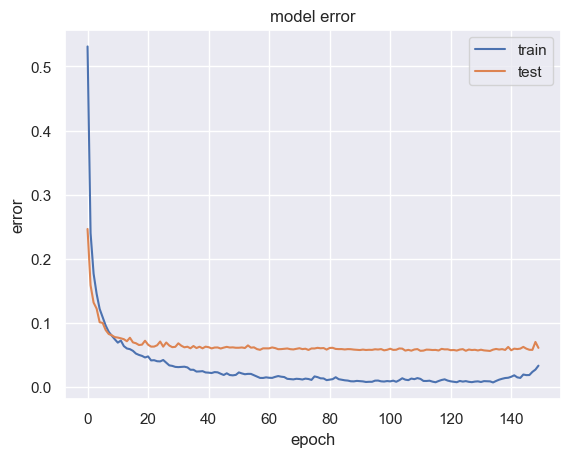

In [74]:
# Summarize history for error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

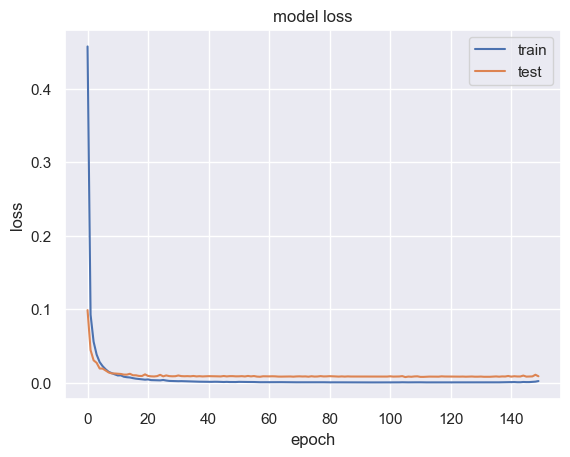

In [75]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [76]:
# Prediction
pred = model.predict(X_test).reshape(1,-1)[0]

nrmse_solar = NRMSE(y_test, pred)


print("nrmse : ",nrmse_solar)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
nrmse :  0.0704600778756298


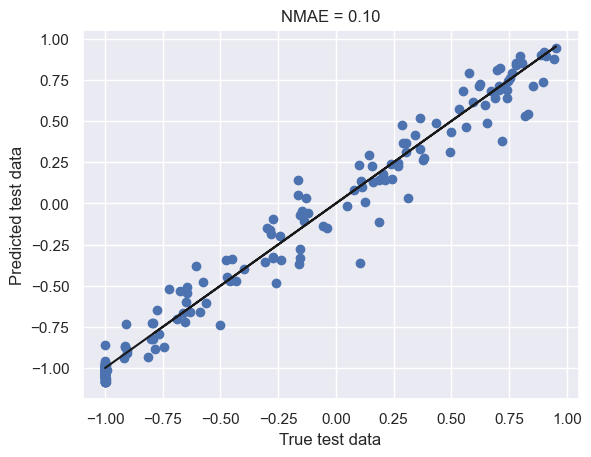

In [77]:
plt.scatter(y_test, pred)
plt.title(r"NMAE = %.2f" % (np.abs(y_test - pred).mean()/y_test.std()))
plt.plot(y_test, y_test, 'k-')
plt.xlabel('True test data')
plt.ylabel('Predicted test data')
plt.show()

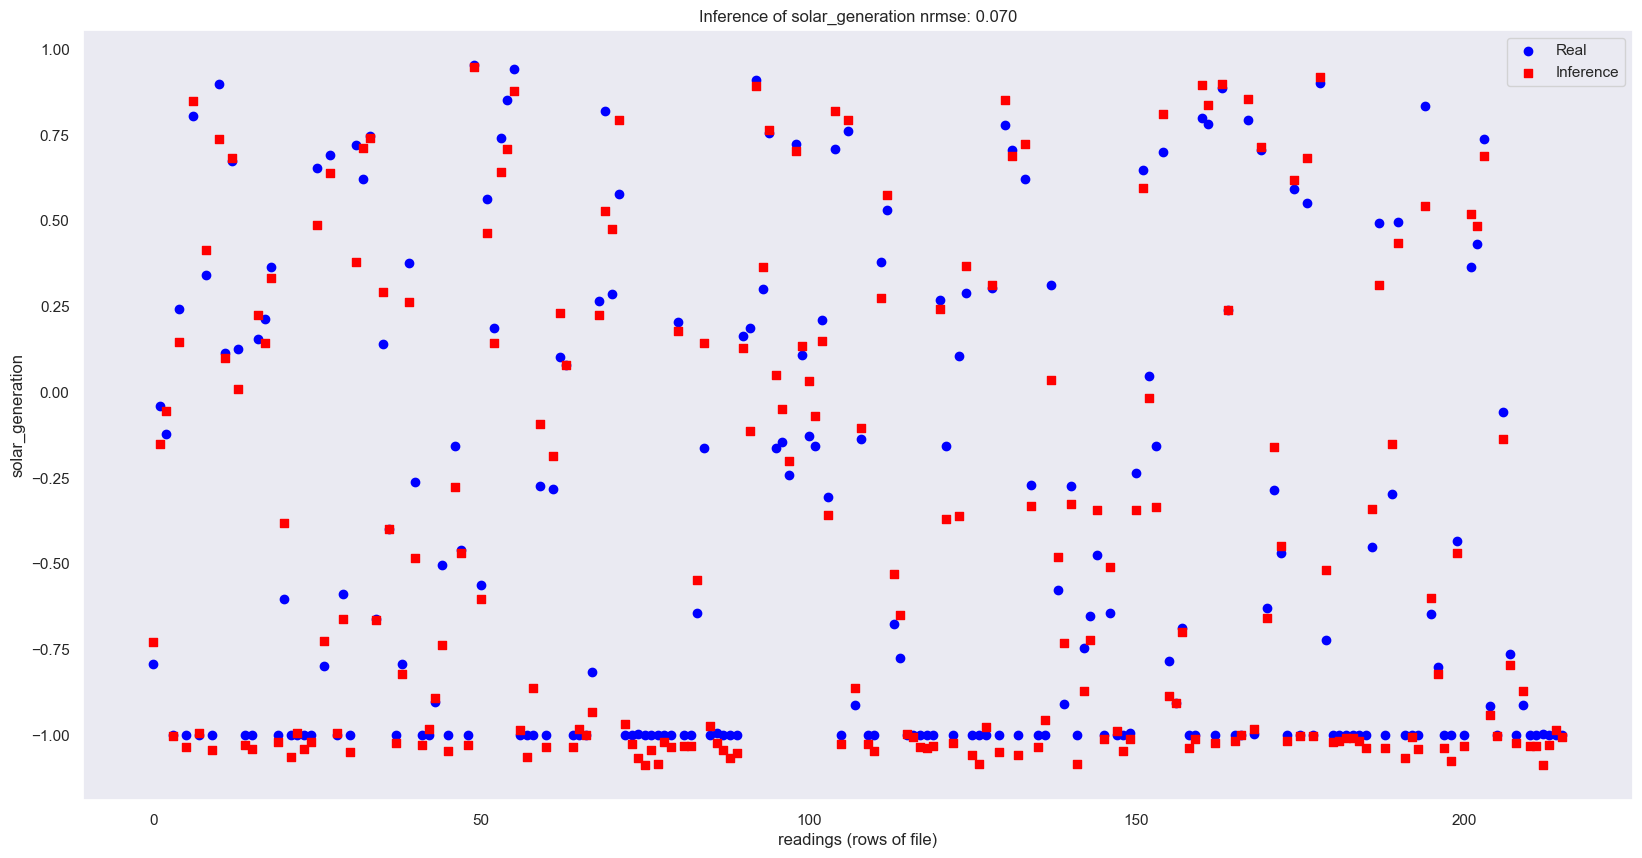

In [78]:
my_x=np.arange(0,len(X_test[:, 0]),1)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, y_test, label='Real', color='blue', marker='o')
plt.scatter(my_x, pred, label='Inference', color='red', marker='s')
plt.title(f'Inference of solar_generation nrmse: {nrmse_solar:.3f}')
plt.ylabel('solar_generation')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

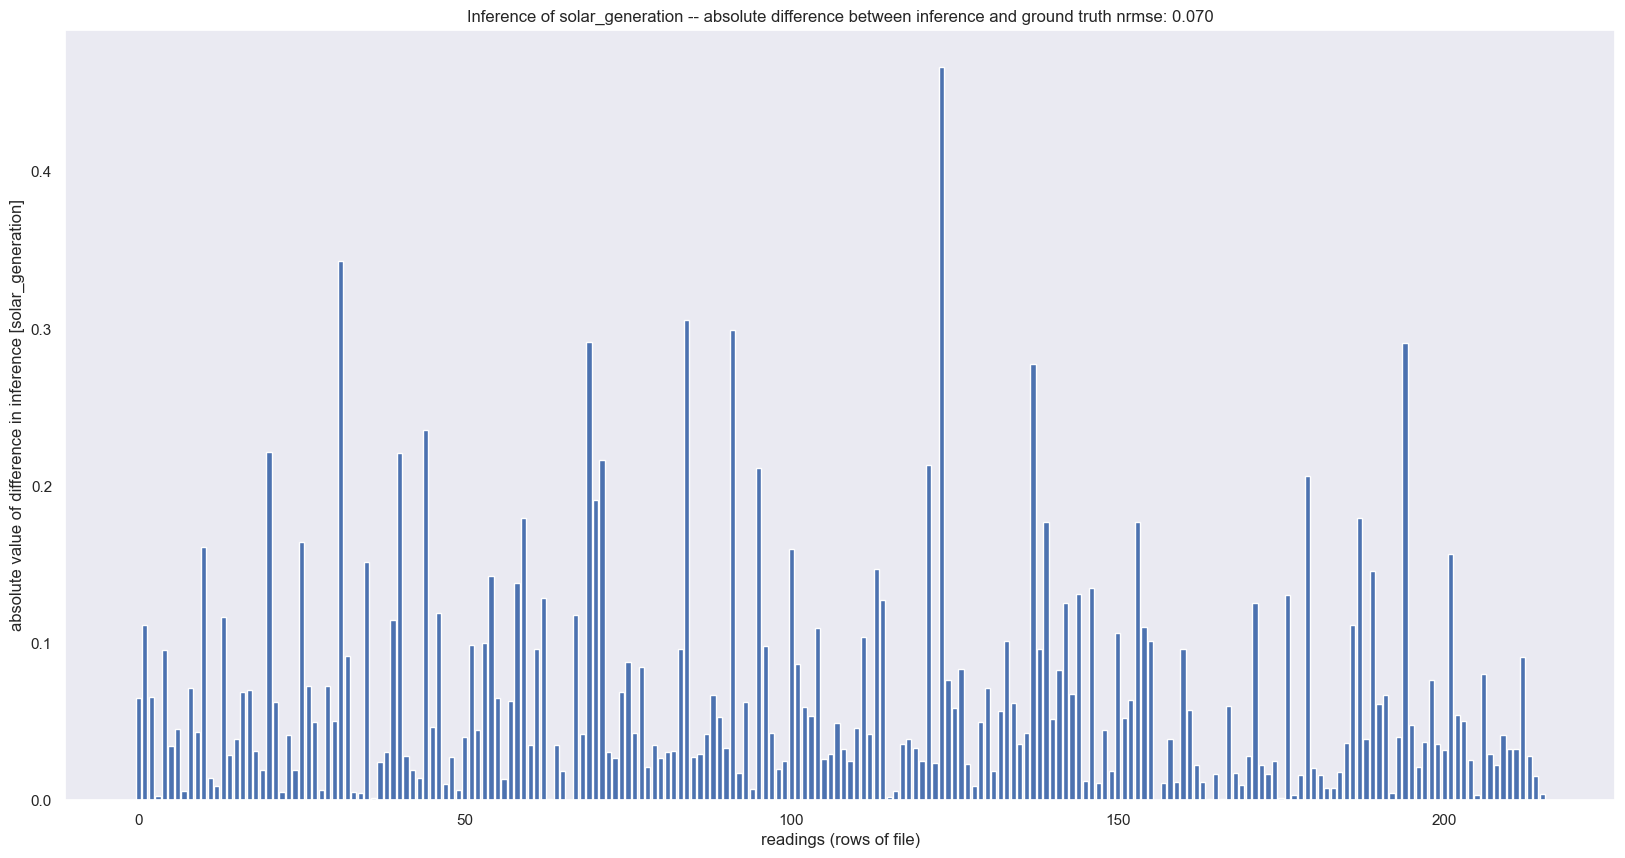

In [79]:
fig = plt.figure(figsize=(20,10))
my_d = abs(y_test-pred)

plt.bar(my_x,my_d)
plt.title(f'Inference of solar_generation -- absolute difference between inference and ground truth nrmse: {nrmse_solar:.3f}')
plt.ylabel('absolute value of difference in inference [solar_generation]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()

In [80]:
w = 48

nrmse_single_solar = NRMSE_window_single_variable(y_test, pred, w)
print("NRMSE per singola variabile con finestra temporale:", nrmse_single_solar)

NRMSE per singola variabile con finestra temporale: 0.07359350026740653


In [81]:
#non riuscendo a capire molto dalla sola formula ho provato a "tradurre" la definizione e ho dato due soluzioni

#questo ScoreForecast è dato dalla somma di tutte le NRMSE calcolate precedentemente e divise per il numero totale di variabili
ScoreForecast = (nrmse_solar + nrmse_carbon) / 2
print(f"La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: {ScoreForecast:.3f}.")

La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: 0.079.


In [82]:
#questo invece è dato dalla somma di tutte le NRMSE tenendo conto di una finestra temporale (48h), e si dovrebbe avvicinare alla formula
ScoreForecast = (nrmse_single_solar + nrmse_single_carbon) / 2
print(f"La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: {ScoreForecast:.3f}.")

La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: 0.085.
